In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
import joblib



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("crop_production.csv")

In [3]:
df.shape


(172324, 7)

In [4]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [7]:
df.describe()

,Crop_Year,Area,Production
count,172324.000000,1.723240e+05,1.695310e+05
mean,2005.753209,1.199428e+04,4.809359e+05
std,4.973732,4.706265e+04,1.575459e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.900000e+01
50%,2006.000000,5.850000e+02,7.500000e+02
75%,2010.000000,4.346000e+03,7.059000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       2793
dtype: int64

In [9]:
df = df.dropna(how='any')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
172319,West Bengal,PURULIA,2011,Autumn,Rice,200.0,245.0
172320,West Bengal,PURULIA,2011,Autumn,Sesamum,155.0,79.0
172321,West Bengal,PURULIA,2011,Kharif,Bajra,59.0,22.0
172322,West Bengal,PURULIA,2011,Kharif,Horse-gram,642.0,317.0


In [10]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
df_ob = df.select_dtypes(object)
df_ob

,State_Name,District_Name,Season,Crop
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Arecanut
1,Andaman and Nicobar Islands,NICOBARS,Kharif,Other Kharif pulses
2,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Cashewnut
...,...,...,...,...
172319,West Bengal,PURULIA,Autumn,Rice
172320,West Bengal,PURULIA,Autumn,Sesamum
172321,West Bengal,PURULIA,Kharif,Bajra
172322,West Bengal,PURULIA,Kharif,Horse-gram


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df_num = df.select_dtypes(["float64","int64"])
df_num= df_num.drop("Production" ,axis = 1)
df_num

,Crop_Year,Area
0,2000,1254.0
1,2000,2.0
2,2000,102.0
3,2000,176.0
4,2000,720.0
...,...,...
172319,2011,200.0
172320,2011,155.0
172321,2011,59.0
172322,2011,642.0


In [14]:
for col in df_ob:
    le = LabelEncoder()
    df_ob[col] = le.fit_transform(df_ob[col])

In [15]:
#category_col =['State_Name', 'District_Name', 'Crop']

In [16]:
#mapping_dict ={} 
#for col in category_col: 
    #df[col] = le.fit_transform(df[col]) 
  
    #le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_))) 
  
    #mapping_dict[col]= le_name_mapping 
#print(mapping_dict) 

In [17]:
df_ob

,State_Name,District_Name,Season,Crop
0,0,419,1,2
1,0,419,1,74
2,0,419,1,95
3,0,419,4,7
4,0,419,4,22
...,...,...,...,...
172319,32,463,0,95
172320,32,463,0,102
172321,32,463,1,6
172322,32,463,1,45


In [18]:
df_mer = pd.concat([df_ob,df_num],axis=1)

In [19]:
df_mer = pd.concat([df_mer,df["Production"]],axis=1)

In [20]:
df_mer

,State_Name,District_Name,Season,Crop,Crop_Year,Area,Production
0,0,419,1,2,2000,1254.0,2000.0
1,0,419,1,74,2000,2.0,1.0
2,0,419,1,95,2000,102.0,321.0
3,0,419,4,7,2000,176.0,641.0
4,0,419,4,22,2000,720.0,165.0
...,...,...,...,...,...,...,...
172319,32,463,0,95,2011,200.0,245.0
172320,32,463,0,102,2011,155.0,79.0
172321,32,463,1,6,2011,59.0,22.0
172322,32,463,1,45,2011,642.0,317.0


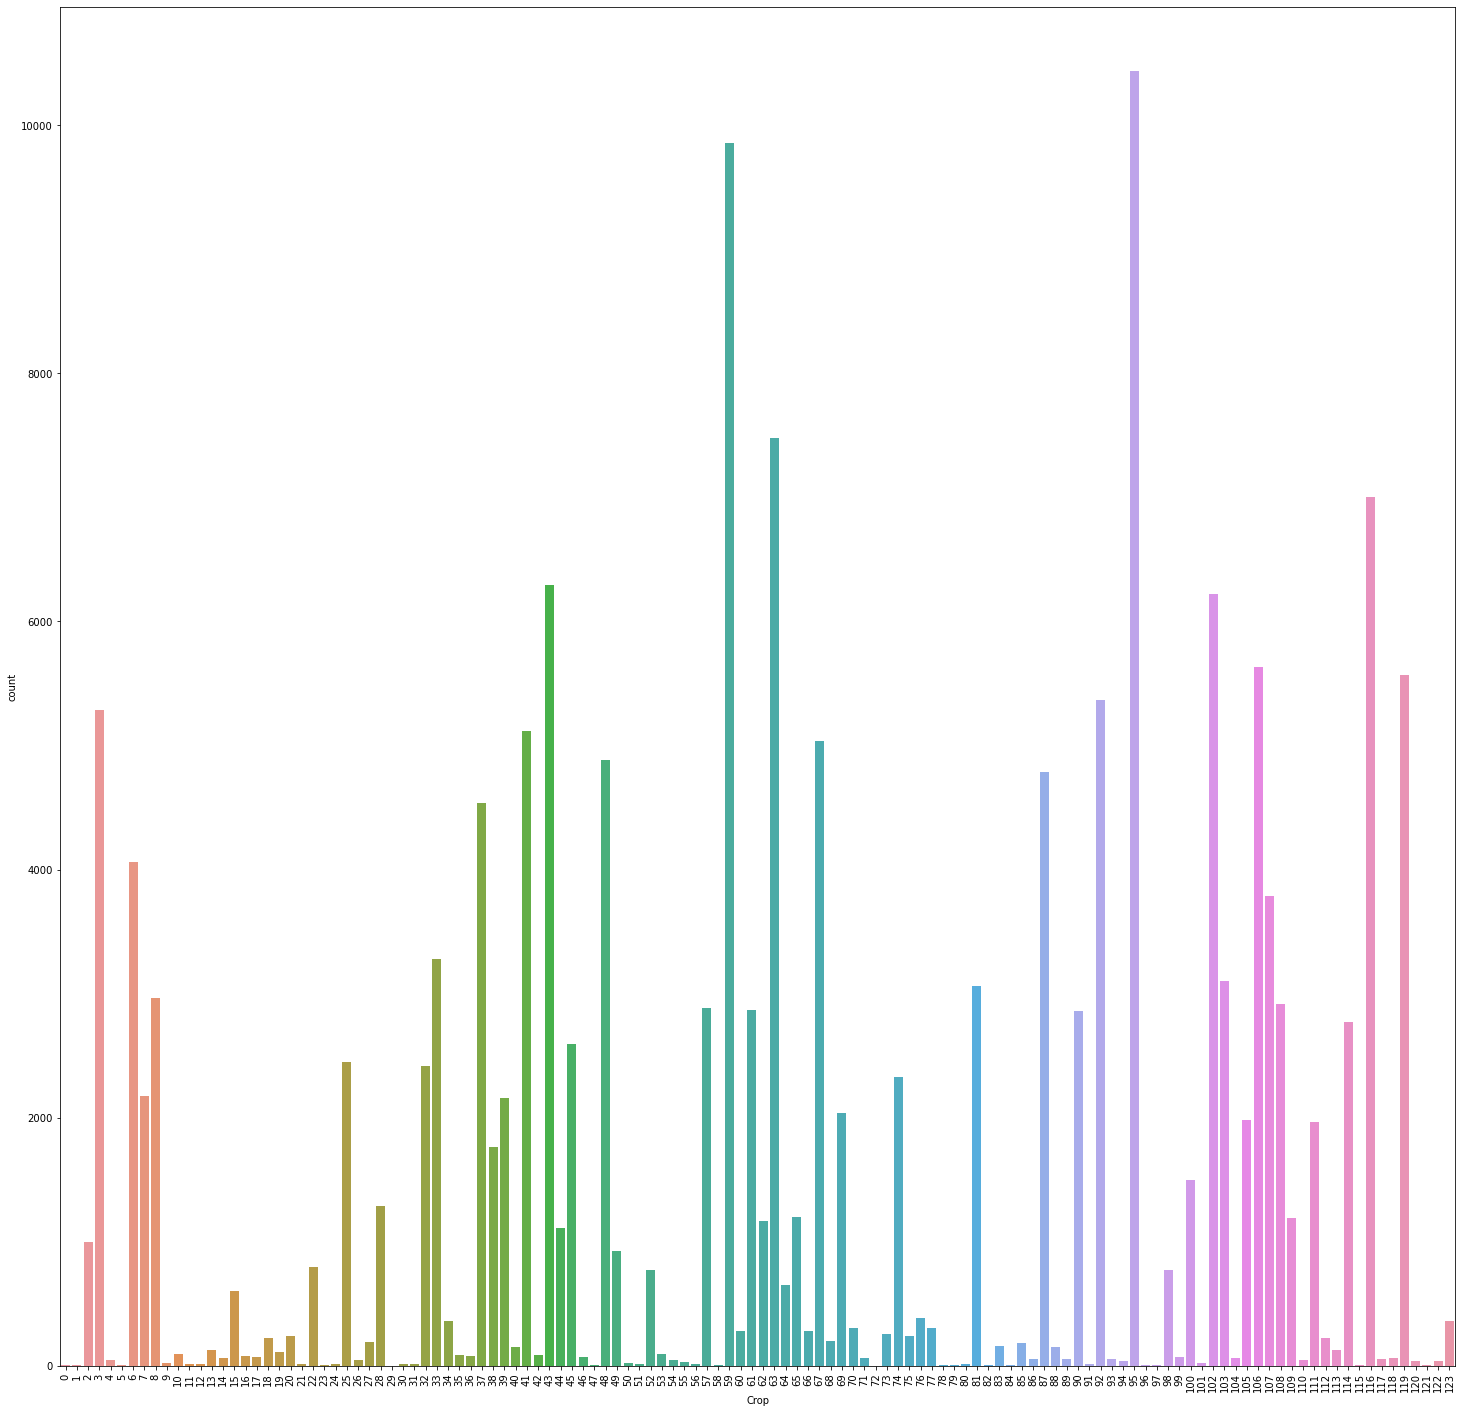

In [21]:
plt.figure(figsize= (25,25))
sns.countplot(data = df_mer, x = "Crop")
plt.xticks(rotation = 90)
plt.show()

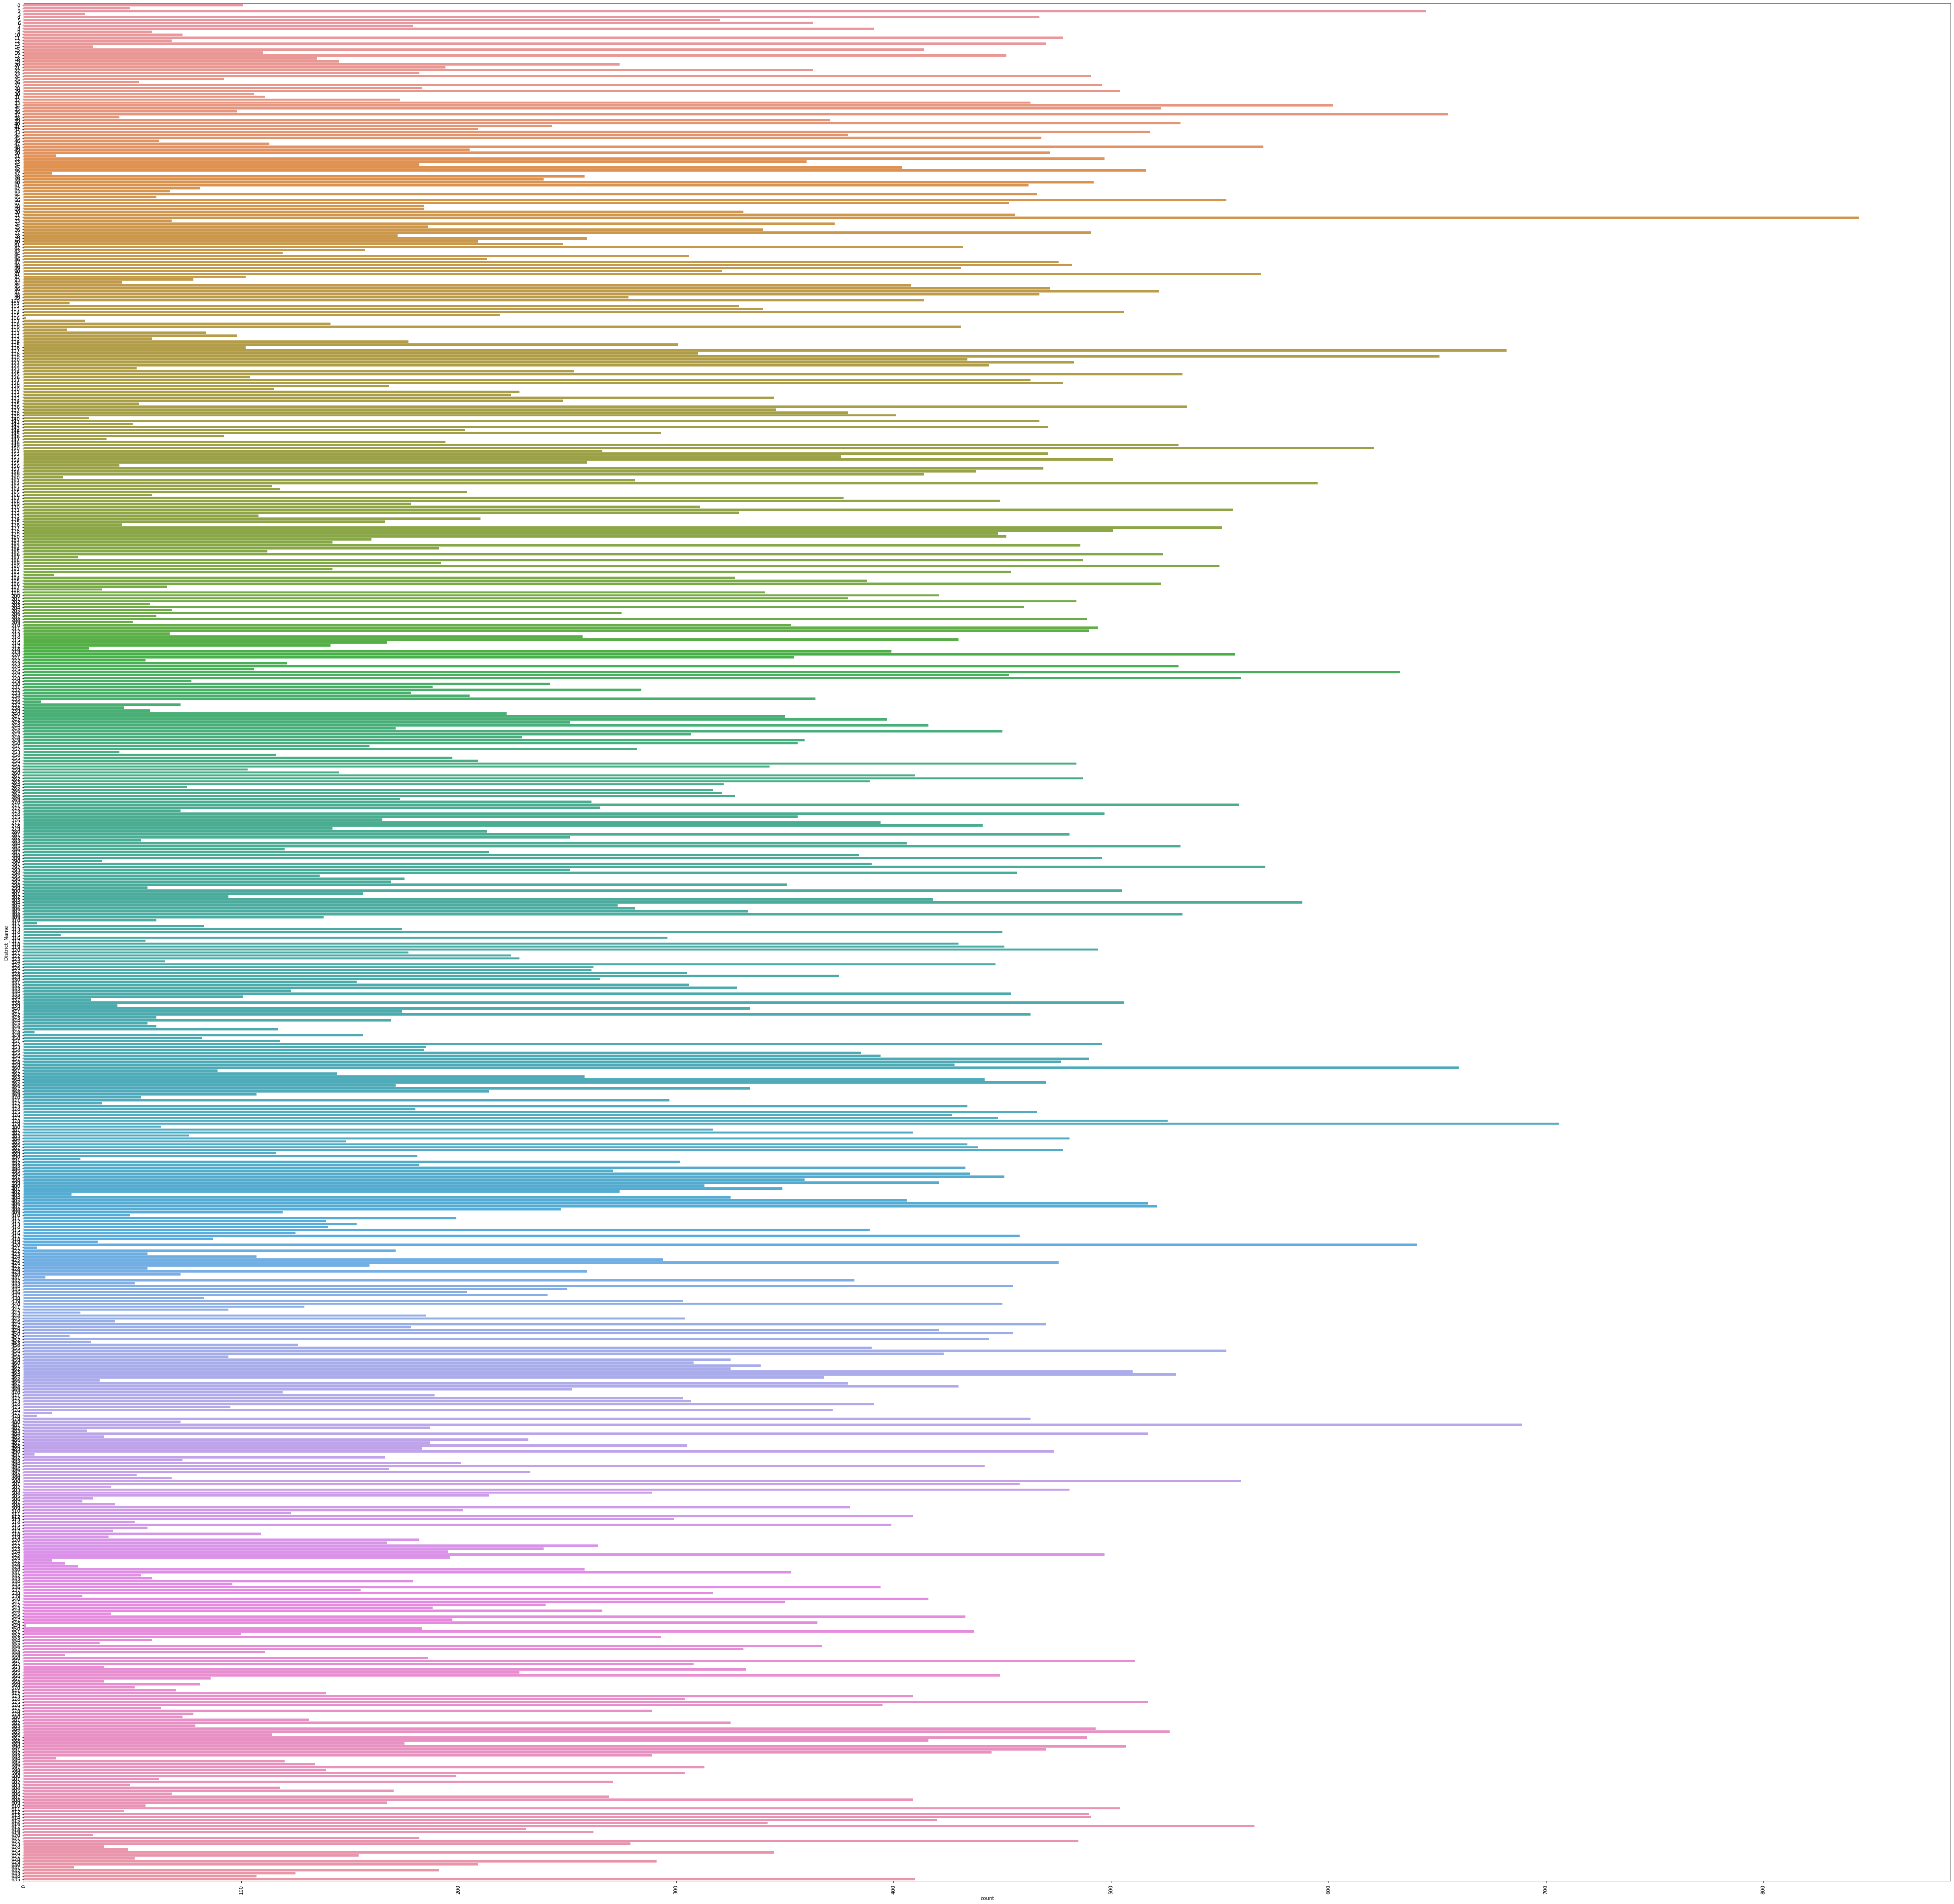

In [22]:
plt.figure(figsize= (70,70))
sns.countplot(data = df_mer,y = "District_Name")
plt.xticks(rotation = 90)
plt.show()

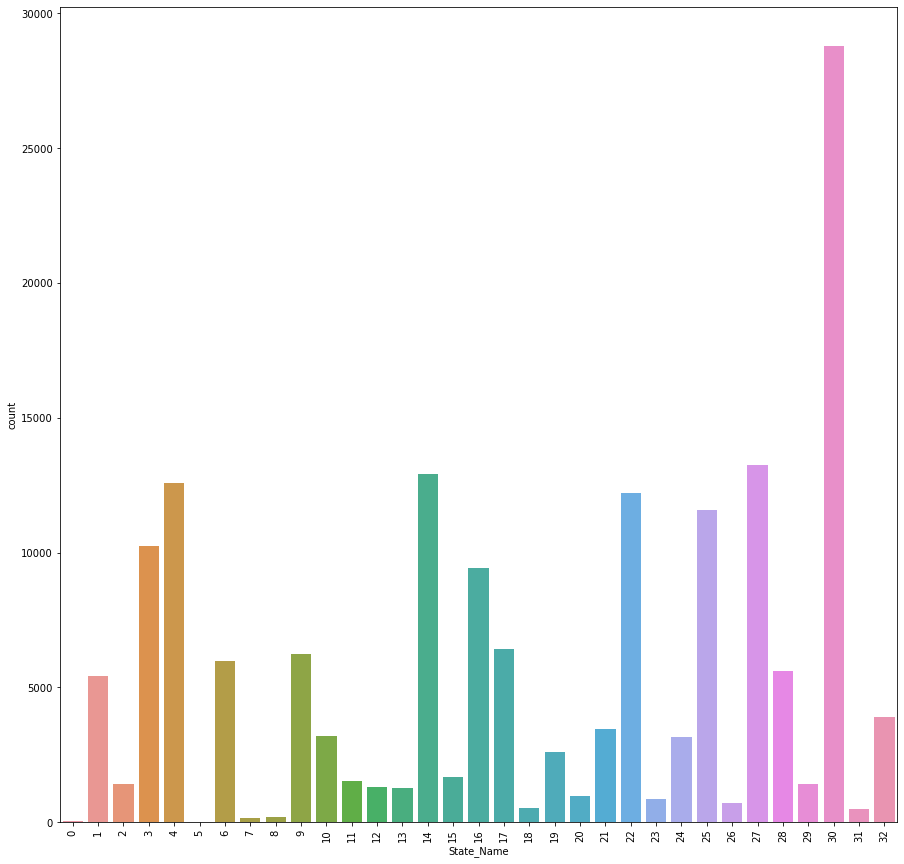

In [23]:
plt.figure(figsize= (15,15))
sns.countplot(data = df_mer, x = "State_Name")
plt.xticks(rotation = 90)
plt.show()

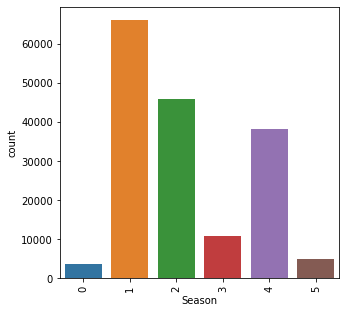

In [24]:
plt.figure(figsize = (5,5))
sns.countplot(data = df_mer, x = "Season")
plt.xticks(rotation = 90)
plt.show()

In [25]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [26]:
df_mer

,State_Name,District_Name,Season,Crop,Crop_Year,Area,Production
0,0,419,1,2,2000,1254.0,2000.0
1,0,419,1,74,2000,2.0,1.0
2,0,419,1,95,2000,102.0,321.0
3,0,419,4,7,2000,176.0,641.0
4,0,419,4,22,2000,720.0,165.0
...,...,...,...,...,...,...,...
172319,32,463,0,95,2011,200.0,245.0
172320,32,463,0,102,2011,155.0,79.0
172321,32,463,1,6,2011,59.0,22.0
172322,32,463,1,45,2011,642.0,317.0


In [27]:
#q1 = np.quantile(df_mer["Area"],0.25)
#q3 = np.quantile(df_mer["Area"],0.75)
#iqr = q3 - q1
#up_whis = q3 + 3*iqr
#df_mer = df_mer[df_mer["Area"] <= up_whis]

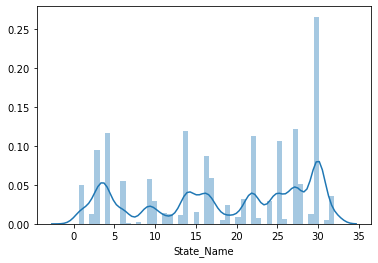

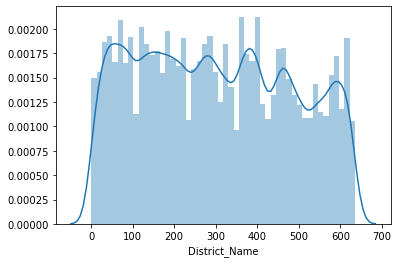

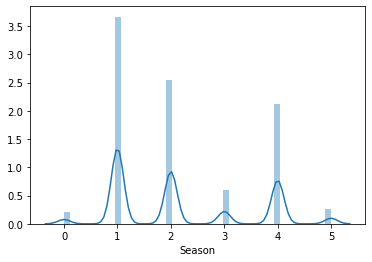

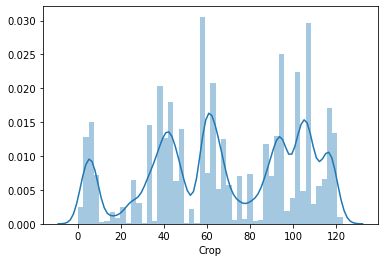

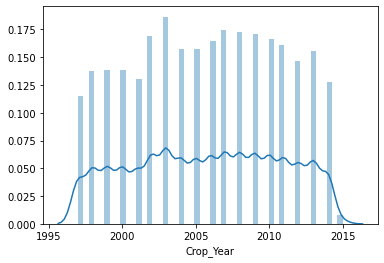

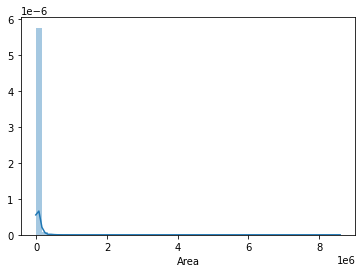

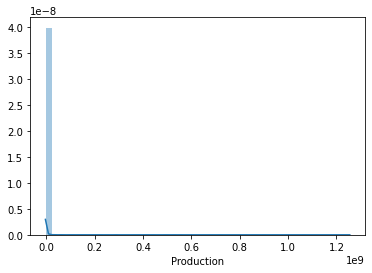

In [28]:
for col in df_mer:
    plt.figure()
    sns.distplot(df_mer[col])
    plt.show()

In [29]:
cor = df_mer.corr()
cor

,State_Name,District_Name,Season,Crop,Crop_Year,Area,Production
State_Name,1.000000,-0.043388,-0.021752,0.004457,-0.076546,0.040305,-0.009315
District_Name,-0.043388,1.000000,0.032291,-0.008867,-0.002811,-0.022094,0.009531
Season,-0.021752,0.032291,1.000000,0.049191,-0.028590,-0.055213,0.039692
Crop,0.004457,-0.008867,0.049191,1.000000,-0.000086,0.074240,-0.029817
Crop_Year,-0.076546,-0.002811,-0.028590,-0.000086,1.000000,-0.028002,0.011382
Area,0.040305,-0.022094,-0.055213,0.074240,-0.028002,1.000000,0.038831
Production,-0.009315,0.009531,0.039692,-0.029817,0.011382,0.038831,1.000000


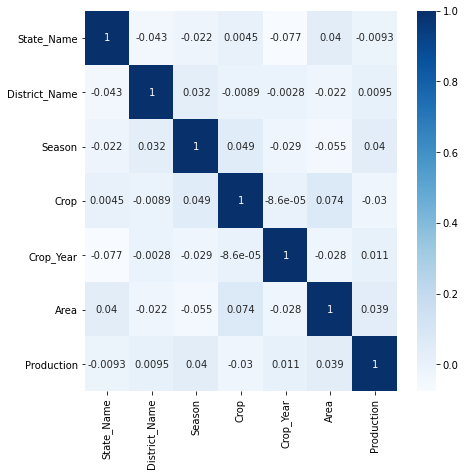

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(cor,cmap="Blues",annot=True)
plt.show()

In [31]:
cor['Production'].sort_values(ascending=False), '\n'

(Production       1.000000
 Season           0.039692
 Area             0.038831
 Crop_Year        0.011382
 District_Name    0.009531
 State_Name      -0.009315
 Crop            -0.029817
 Name: Production, dtype: float64,
 '\n')

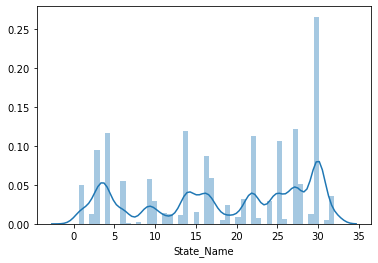

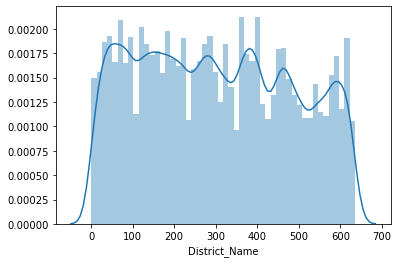

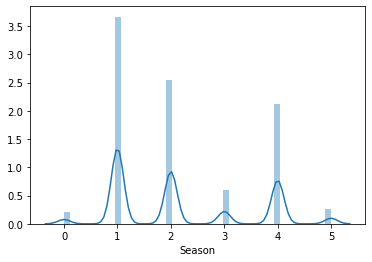

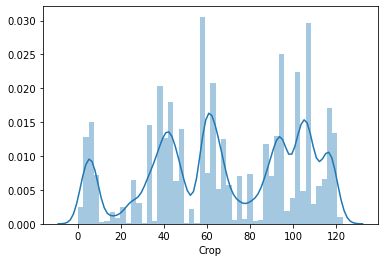

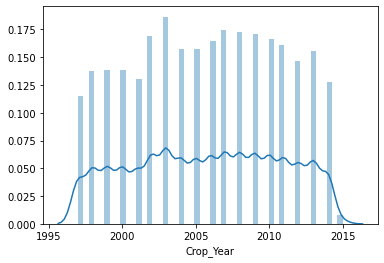

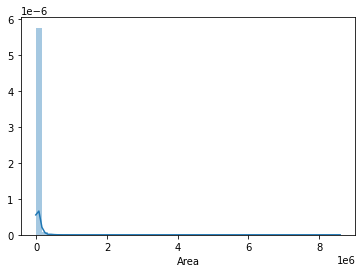

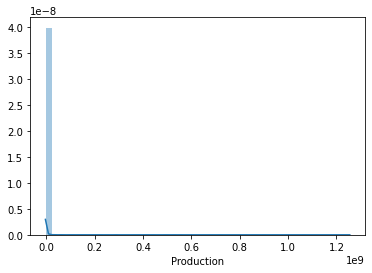

In [32]:
for col in df_mer:
    plt.figure()
    sns.distplot(df_mer[col])
    plt.show()

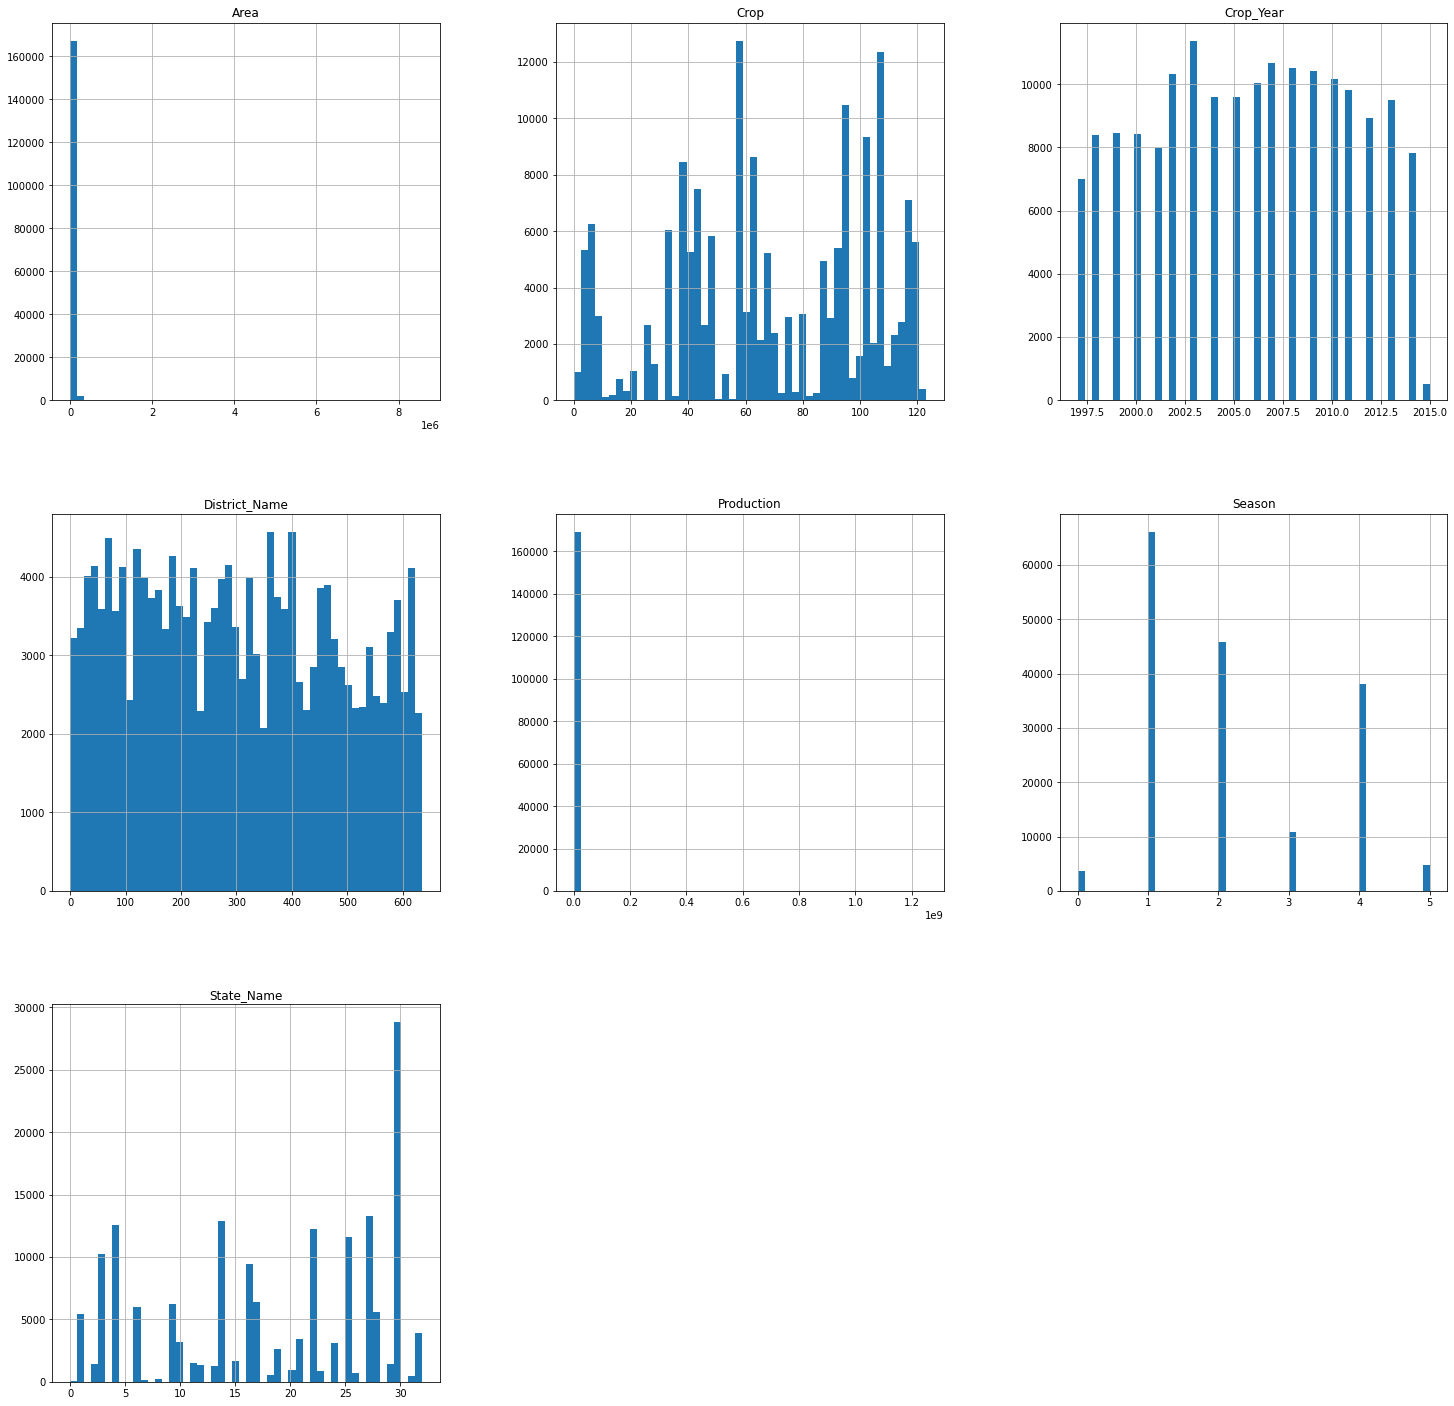

In [33]:
df_mer.hist(bins=50, figsize=(25, 25))
plt.show()

In [34]:
df_mer

,State_Name,District_Name,Season,Crop,Crop_Year,Area,Production
0,0,419,1,2,2000,1254.0,2000.0
1,0,419,1,74,2000,2.0,1.0
2,0,419,1,95,2000,102.0,321.0
3,0,419,4,7,2000,176.0,641.0
4,0,419,4,22,2000,720.0,165.0
...,...,...,...,...,...,...,...
172319,32,463,0,95,2011,200.0,245.0
172320,32,463,0,102,2011,155.0,79.0
172321,32,463,1,6,2011,59.0,22.0
172322,32,463,1,45,2011,642.0,317.0


In [35]:
df_mer.isnull().sum()


State_Name       0
District_Name    0
Season           0
Crop             0
Crop_Year        0
Area             0
Production       0
dtype: int64

In [36]:
#df_mer = df_mer.astype(int)

In [37]:
X = df_mer.drop("Production" ,axis = 1)
y = df_mer['Production']

In [38]:
X

,State_Name,District_Name,Season,Crop,Crop_Year,Area
0,0,419,1,2,2000,1254.0
1,0,419,1,74,2000,2.0
2,0,419,1,95,2000,102.0
3,0,419,4,7,2000,176.0
4,0,419,4,22,2000,720.0
...,...,...,...,...,...,...
172319,32,463,0,95,2011,200.0
172320,32,463,0,102,2011,155.0
172321,32,463,1,6,2011,59.0
172322,32,463,1,45,2011,642.0


In [39]:
y

0         2000.0
1            1.0
2          321.0
3          641.0
4          165.0
           ...  
172319     245.0
172320      79.0
172321      22.0
172322     317.0
172323       6.0
Name: Production, Length: 169531, dtype: float64

In [40]:
X = df_mer.drop('Production', axis = 1)
y = df_mer['Production']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf =  RandomForestRegressor(n_estimators =200,max_depth=20)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_predf = rf.predict(X_test)

In [ ]:
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_predf))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_predf))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_predf)))
print('R-Square :'," ", np.sqrt(metrics.r2_score(y_test,y_predf)))

In [ ]:
accuracy_train = rf.score(X_train, y_train)
accuracy_test = rf.score(X_test, y_test)
print(accuracy_train)
print(accuracy_test)

In [ ]:
test_array = np.array([[32,463,0,95,2011,200]])
predict_price = rf.predict(test_array)[0]
predict_price

In [ ]:
sns.distplot(y_test - y_predf,bins=50)

In [ ]:
plt.scatter(y_test,y_predf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
filename = 'finalized_model.sav'
joblib.dump(rf, filename) 

In [ ]:

# Its important to use binary mode 
model_ = open('finalized_model.sav', 'wb') 

# source, destination 
pickle.dump(rf, model_)                      


# load the model from disk
model = pickle.load(open('finalized_model.sav', 'rb'))